In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split

## Bias-Variance Tradeoff

In modeling we make the assumption that the data follows some unknown function with some noise:

$$
f(X) + \epsilon
$$

Then we create a model $\hat{f}(X)$ that approximates this model as best it can!
- Note that $\epsilon$ is fixed. It represents a barrier to our predictive capabilities in some sense.

The **Bias** of our model $\hat{f}(X)$ is the expected error of our model:
$$
\text{E}[(f(X) - \hat{f}(X)]
$$
However, we don't know $f(X)$ in practice so we often use the loss of our model against the training set as a stand-in for bias. In other words the bias refers to how well the model is at predicting the target variable.

The **Variance** of our model $\text{Var}[\hat{f}(X)]$ represents how sensitive our model is to perturbations in the data.

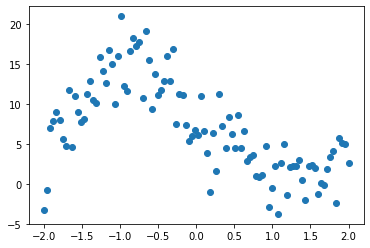

In [2]:
# let's use similar fake nonlinear data as when we discussed under/over fitting
num_pts = 100
X = np.linspace(-2, 2, num_pts)

# noise
epsilon = np.random.normal(0, 3, num_pts)

# degree 3 polynomial
Y = 3*(X-1)*(X+2)*(X-1.5) + epsilon

plt.scatter(x=X, y=Y)
plt.show()

- Since the data is non-linear, a linear model has high *Bias* here. We see that the expected error is quite large.
- The linear model also has low *Variance*. If I perturb the input variable $X$, the output is perturbed in a linear fashion.

7.067613263518129 -2.9304771212879186


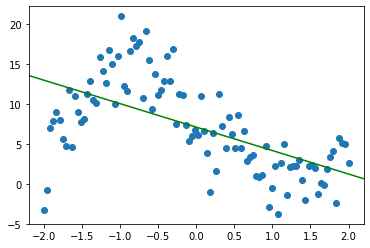

In [3]:
model = sm.OLS(Y, sm.add_constant(X), hasconst=True)
res = model.fit()
b, m = res.params
print(b, m)

# plot the points
plt.scatter(x=X, y=Y)

# plot the line
plt.axline((0, b), slope=m, color='green')
plt.show()

Let's fit a high degree polynomial to the data now.

In [4]:
df = pd.DataFrame({'x':X, 'y':Y})

n = 30

for i in range(n-1):
    df[f'x_{i+2}'] = X**(i+2)
df.head()

x         y       x_2       x_3        x_4        x_5        x_6  \
0 -2.000000 -3.274046  4.000000 -8.000000  16.000000 -32.000000  64.000000   
1 -1.959596 -0.777912  3.840016 -7.524880  14.745725 -28.895664  56.623826   
2 -1.919192  6.921322  3.683298 -7.068955  13.566681 -26.037065  49.970125   
3 -1.878788  7.787290  3.529844 -6.631828  12.459798 -23.409317  43.981142   
4 -1.838384  8.962146  3.379655 -6.213103  11.422069 -20.998147  38.602654   

          x_7         x_8         x_9  ...          x_21          x_22  \
0 -128.000000  256.000000 -512.000000  ... -2.097152e+06  4.194304e+06   
1 -110.959821  217.436417 -426.087524  ... -1.366146e+06  2.677095e+06   
2  -95.902261  184.054844 -353.236569  ... -8.820365e+05  1.692797e+06   
3  -82.631236  155.246564 -291.675363  ... -5.641996e+05  1.060011e+06   
4  -70.966495  130.463657 -239.842278  ... -3.574045e+05  6.570467e+05   

           x_23          x_24          x_25          x_26          x_27  \
0 -8.388608e+06  1.677722e+07 -3.355443e+07  6.710886e+07 -1.342177e+08   
1 -5.246024e+06  1.028009e+07 -2.014482e+07  3.947571e+07 -7.735644e+07   
2 -3.248803e+06  6.235076e+06 -1.196631e+07  2.296564e+07 -4.407547e+07   
3 -1.991536e+06  3.741674e+06 -7.029812e+06  1.320753e+07 -2.481414e+07   
4 -1.207904e+06  2.220591e+06 -4.082299e+06  7.504833e+06 -1.379676e+07   

           x_28          x_29          x_30  
0  2.684355e+08 -5.368709e+08  1.073742e+09  
1  1.515874e+08 -2.970500e+08  5.820979e+08  
2  8.458929e+07 -1.623431e+08  3.115675e+08  
3  4.662051e+07 -8.759004e+07  1.645631e+08  
4  2.536375e+07 -4.662830e+07  8.572072e+07  

[5 rows x 31 columns]

In [5]:
indep_var = 'x'
for i in range(n-1):
    indep_var = indep_var + f' + x_{i+2}'
print(indep_var)

model = ols(formula = f'y ~ {indep_var}', data=df)
res = model.fit()
res.summary()

x + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     11.39
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           8.87e-17
Time:                        13:55:01   Log-Likelihood:                -227.81
No. Observations:                 100   AIC:                             517.6
Df Residuals:                      69   BIC:                             598.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3064      1.284      4.912      0.000       3.745       8.868
x             -8.7526     11.179     -0.783      0.436     -31.054      13.549
x_2           11.2563     72.056      0.156      0.876    -132.492     155.005
x_3         -180.8210    285.047     -0.634      0.528    -749.474     387.832
x_4          565.3656   1111.638      0.509      0.613   -1652.291    2783.022
x_5         2526.2065   2615.966      0.966      0.338   -2692.503    7744.916
x_6        -5754.7357   7514.819     -0.766      0.446   -2.07e+04    9236.919
x_7         -1.32e+04    1.2e+04     -1.103      0.274   -3.71e+04    1.07e+04
x_8          2.45e+04   2.78e+04      0.881      0.382    -3.1e+04       8e+04
x_9         3.689e+04    3.2e+04      1.152      0.253    -2.7e+04    1.01e+05
x_10       -5.905e+04   6.35e+04     -0.930      0.356   -1.86e+05    6.77e+04
x_11       -6.382e+04   5.48e+04     -1.164      0.248   -1.73e+05    4.55e+04
x_12        9.041e+04    9.6e+04      0.942      0.350   -1.01e+05    2.82e+05
x_13        7.369e+04   6.34e+04      1.162      0.249   -5.28e+04       2e+05
x_14       -9.356e+04      1e+05     -0.932      0.355   -2.94e+05    1.07e+05
x_15       -5.922e+04   5.12e+04     -1.156      0.252   -1.61e+05    4.29e+04
x_16         6.78e+04   7.46e+04      0.909      0.367    -8.1e+04    2.17e+05
x_17        3.384e+04   2.94e+04      1.150      0.254   -2.49e+04    9.25e+04
x_18       -3.508e+04   3.99e+04     -0.878      0.383   -1.15e+05    4.46e+04
x_19       -1.385e+04   1.21e+04     -1.145      0.256    -3.8e+04    1.03e+04
x_20        1.303e+04   1.54e+04      0.843      0.402   -1.78e+04    4.38e+04
x_21        4027.7034   3526.530      1.142      0.257   -3007.531    1.11e+04
x_22       -3447.7585   4275.016     -0.806      0.423    -1.2e+04    5080.665
x_23        -812.8199    712.621     -1.141      0.258   -2234.460     608.820
x_24         634.4988    824.982      0.769      0.444   -1011.294    2280.292
x_25         108.1524     94.831      1.140      0.258     -81.030     297.335
x_26         -77.1610    105.403     -0.732      0.467    -287.434     133.112
x_27          -8.5292      7.473     -1.141      0.258     -23.437       6.378
x_28           5.5739      8.010      0.696      0.489     -10.405      21.553
x_29           0.3019      0.264      1.143      0.257      -0.225       0.829
x_30          -0.1811      0.274     -0.661      0.511      -0.728       0.366
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   2.661
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.392
Skew:                           0.128   Prob(JB):                        0.822
Kurtosis:                       3.170   Cond. No.                     1.16e+14
==

- Note the "squiggliness" of the model. This model might have decent Bias, but it has high variance as well.
- If we perturb the input variable left or right we might drastically change the model output.

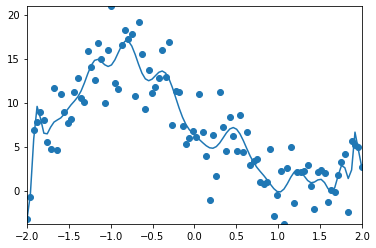

In [6]:
plt.scatter(x=X, y=Y)

# plot the polynomial
coefs = list(res.params)
coefs.reverse()
poly = [np.polyval(coefs, i) for i in X]
plt.plot(X, poly)

plt.xlim(min(X), max(X))
plt.ylim(min(Y), max(Y))
plt.show()

The **Bias-Variance Tradeoff** is the trade-off between reducing Bias and reducing Variance.
- Often to reduce Bias you have to fit the model more closely to the training data. This might result in a high Variance.
- Often to reduce Variance you need to make the model less sensitive to perturbations. This might result in a higher Bias since you are fitting the training data less closely.

This tradeoff relates to the underfitting vs. overfitting problem. Often high Bias implies underfitting and high Variance implies overfitting.
- The job of the model-er is often to find that "sweet spot" in between!

Techniques that center around reducing the Variance of a model or attempting to reduce the model from overfitting to the training are types of **Regularization**.

## Ridge and Lasso Regression
- These two regularization methods concern the *size* of the coefficients in linear or logistic regression.
- Note the size of the coefficients in the polynomial regression above!

Idea behind reducing the size of the cofficients:
- Makes it harder for the model to overfit, less able to be "squiggly"
- Reduces the effect of multicolinearity, often one variable will "take over" the other.

In [7]:
# let's take a look at the taxi data
df_taxis = sns.load_dataset('taxis')
df_taxis.head()

pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

In [8]:
# for fun I'm going to make a new variable
df_taxis['distance_ft'] = df_taxis['distance'] * 5280
df_taxis[['distance', 'distance_ft']].describe()

distance    distance_ft
count  6433.000000    6433.000000
mean      3.024617   15969.976807
std       3.827867   20211.137765
min       0.000000       0.000000
25%       0.980000    5174.400000
50%       1.640000    8659.200000
75%       3.210000   16948.800000
max      36.700000  193776.000000

In [9]:
# predict distance from total fare
model = ols(formula = 'distance_ft ~ total + passengers', data=df_taxis)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            distance_ft   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.449e+04
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:01   Log-Likelihood:                -67416.
No. Observations:                6433   AIC:                         1.348e+05
Df Residuals:                    6430   BIC:                         1.349e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8415.8083    224.713    -37.451      0.000   -8856.321   -7975.296
total       1323.5837      7.774    170.254      0.000    1308.344    1338.824
passengers   -80.6016     89.223     -0.903      0.366    -255.509      94.306
==============================================================================
Omnibus:                     6966.038   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2963579.447
Skew:                          -4.832   Prob(JB):                         0.00
Kurtosis:                     107.704   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Why are the values so large?
- Why might it be a bad idea to limit the size of the coefficients here?

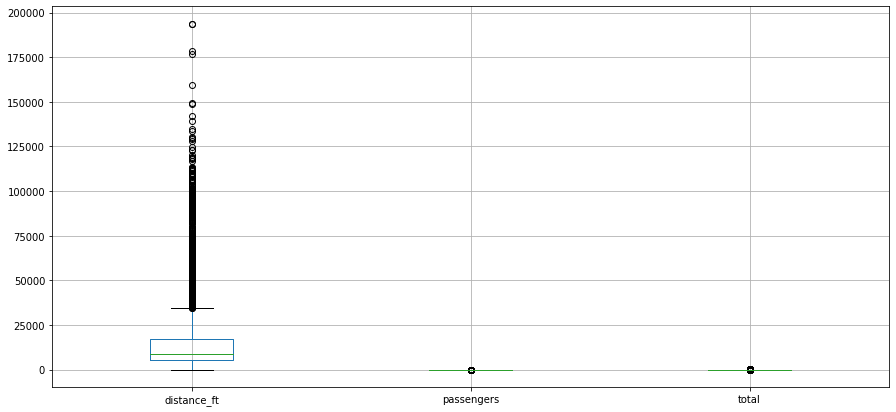

In [10]:
df_taxis[['distance_ft', 'passengers', 'total']].boxplot(figsize=(15,7)) 
plt.show()

Often **Normalizing** the data prevents issues such as this. It also may drastically improve your model as variables at different scales can make numerical optimization techniques less effective.

To normalize a variable $X$ we create a new variable

$$
X' = \frac{X - \mu}{\sigma}
$$

where $\mu, \sigma$ are the mean and standard deviation of $X$ respectively.

In [11]:
df = df_taxis.copy()[['distance', 'distance_ft', 'passengers', 'total']]
df_taxis_normalized = (df - df.mean()) / df.std()
df_taxis_normalized.describe()

distance   distance_ft    passengers         total
count  6.433000e+03  6.433000e+03  6.433000e+03  6.433000e+03
mean  -5.743545e-17 -1.369614e-16 -8.836222e-18 -5.301733e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -7.901572e-01 -7.901572e-01 -1.278694e+00 -1.246260e+00
25%   -5.341400e-01 -5.341400e-01 -4.479689e-01 -5.586302e-01
50%   -3.617202e-01 -3.617202e-01 -4.479689e-01 -3.154263e-01
75%    4.842989e-02  4.842989e-02  3.827558e-01  1.289998e-01
max    8.797428e+00  8.797428e+00  3.705655e+00  1.131348e+01

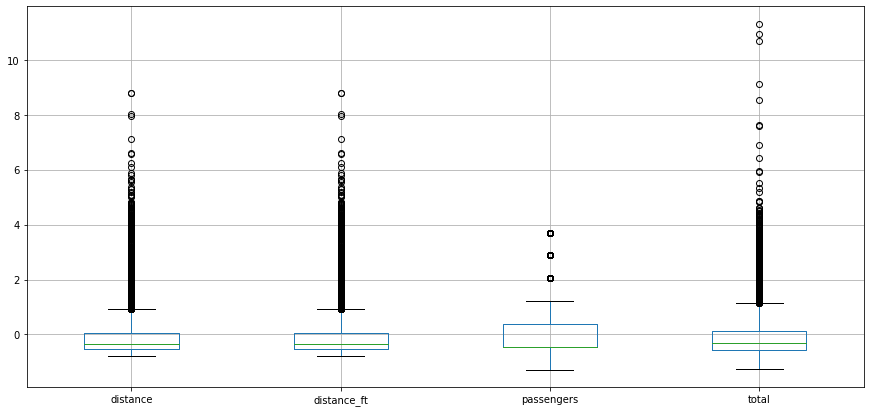

In [12]:
df_taxis_normalized.boxplot(figsize=(15,7)) 
plt.show()

- Notice what happens to distance vs. distance_ft when normalized!
- Note that the $R^2$ below did not change, but the coefficients did.

In [13]:
model = ols(formula = 'distance_ft ~ total + passengers', data=df_taxis_normalized)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            distance_ft   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.449e+04
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:55:02   Log-Likelihood:                -3639.2
No. Observations:                6433   AIC:                             7284.
Df Residuals:                    6430   BIC:                             7305.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.129e-16      0.005  -2.12e-14      1.000      -0.010       0.010
total          0.9048      0.005    170.254      0.000       0.894       0.915
passengers    -0.0048      0.005     -0.903      0.366      -0.015       0.006
==============================================================================
Omnibus:                     6966.038   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2963579.447
Skew:                          -4.832   Prob(JB):                         0.00
Kurtosis:                     107.704   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can also do min-max normalization to put everything on a $[0,1]$ scale.

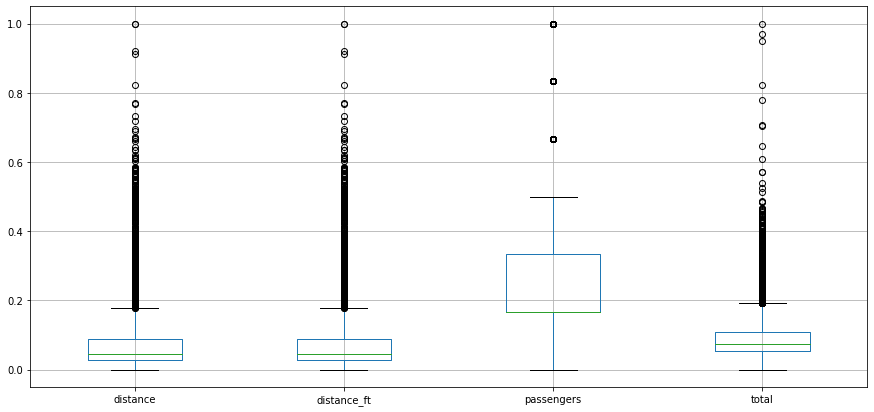

In [14]:
df = df_taxis.copy()[['distance', 'distance_ft', 'passengers', 'total']]
df_taxis_normalized = (df - df.min()) / (df.max() - df.min())
df_taxis_normalized.boxplot(figsize=(15,7)) 
plt.show()

### WARNING
- If we do a train-test split why is it data leakage to normalize the variables against the *entire* dataset??
- Always remember to use the same normalization method/parameters at prediction time!

### Ridge Regression

- Idea: Add a penalty term to the loss function. For example when there are $N$ datapoints and $n$ independent variables.

$$
\begin{align}
\mathcal{L} &= \left(\sum_{i=1}^N (y_i - \hat{y}_i)^2\right) + \lambda \left(\sum_{i=0}^n \beta_0^2\right)\\
&= RSS + \lambda ||\beta||_2^2
\end{align}
$$
- Here $\lambda$ controls the magnitude of the penalty

In [15]:
df_pen = sns.load_dataset('penguins').dropna().reset_index(drop=True)
df_pen.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

In [16]:
train, val = train_test_split(df_pen, test_size=0.95, random_state=2022)

In [17]:
# normalize the numerical columns
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    
    train_mean = train[col].mean()
    train_std = train[col].std()
    
    train[col] = ((train[col] - train_mean) / train_std)
    val[col] = ((val[col] - train_mean) / train_std)

train.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
48      Adelie     Biscoe       -1.432964       0.343659          -0.963697   
126     Adelie      Dream       -1.082578       0.559288          -0.574979   
147  Chinstrap      Dream        0.928332       1.098360          -0.380620   
11      Adelie  Torgersen       -0.793129       0.828824          -0.445406   
283     Gentoo     Biscoe        0.379902      -1.004022           1.239039   

     body_mass_g     sex  
48     -1.515643  Female  
126    -0.863900  Female  
147    -0.429404    Male  
11     -0.918212  Female  
283     0.765459    Male

In [18]:
# An Aside: see what happens if I give the model a categorical variable
model = ols(formula = 'bill_depth_mm ~ bill_length_mm + flipper_length_mm + body_mass_g', data=train)
res = model.fit()
res.summary()

/home/hamstersnail/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     10.97
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           0.000938
Time:                        13:55:02   Log-Likelihood:                -11.630
No. Observations:                  16   AIC:                             31.26
Df Residuals:                      12   BIC:                             34.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          9.159e-16      0.144   6.34e-15      1.000      -0.315       0.315
bill_length_mm        0.8879      0.218      4.064      0.002       0.412       1.364
flipper_length_mm    -0.6950      0.303     -2.291      0.041      -1.356      -0.034
body_mass_g          -0.6009      0.309     -1.945      0.076      -1.274       0.072
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.102
Skew:                           0.087   Prob(JB):                        0.950
Kurtosis:                       2.650   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_pred = res.predict(val)

# score the model
y = val['bill_depth_mm']
y_mean = train['bill_depth_mm'].mean()  # use the mean of the training set

TSS = sum((y - y_mean)**2)
RSS = sum((y - y_pred)**2)
print(f'This model has an R^2 on the validation set of {(TSS - RSS) / TSS}')

This model has an R^2 on the validation set of 0.11590825129463958


In [20]:
# very small training set
len(train)

16

In [21]:
# remember there is some multicolinearity as well
df_pen.corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

In [22]:
# sklearn has a nice ridge regression model
from sklearn.linear_model import Ridge

x_train = train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_train = train['bill_depth_mm']

model = Ridge(alpha=10.0)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.4910578182329578


In [23]:
x_val = val[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_val = val['bill_depth_mm']

r2 = model.score(x_val, y_val)
print(f'This model has an R^2 on the validation set of {r2}')

This model has an R^2 on the validation set of 0.23964943707951614


In [24]:
# also known as hyperparamter tuning
for alpha in [0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]:
    
    # create and evaluate the model for different values of alpha
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    r2 = model.score(x_val, y_val)
    
    print(f'This model has an R^2 on the validation set of {r2} when alpha is {alpha}')

This model has an R^2 on the validation set of 0.09476117403239226 when alpha is 0.01
This model has an R^2 on the validation set of 0.10386749451978816 when alpha is 0.1
This model has an R^2 on the validation set of 0.13811917968765086 when alpha is 0.5
This model has an R^2 on the validation set of 0.16979312959088366 when alpha is 1
This model has an R^2 on the validation set of 0.20931533042689754 when alpha is 2
This model has an R^2 on the validation set of 0.24630092674900117 when alpha is 5
This model has an R^2 on the validation set of 0.23964943707951614 when alpha is 10
This model has an R^2 on the validation set of 0.2027708079344389 when alpha is 20
This model has an R^2 on the validation set of 0.1309288701467407 when alpha is 50
This model has an R^2 on the validation set of 0.0773611405349568 when alpha is 100


### Lasso Regression

- Idea: Add a different penalty term to the loss function. For example when there are $N$ datapoints and $n$ independent variables.

$$
\begin{align}
\mathcal{L} &= \left(\sum_{i=1}^N (y_i - \hat{y}_i)^2\right) + \lambda \left(\sum_{i=0}^n |\beta_0|\right)\\
&= RSS + \lambda ||\beta||_1
\end{align}
$$
- Here $\lambda$ controls the magnitude of the penalty

In [25]:
# sklearn has a nice ridge regression model
from sklearn.linear_model import Lasso

x_train = train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_train = train['bill_depth_mm']

model = Lasso(alpha=0.01)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.7318810323639562


In [26]:
x_val = val[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_val = val['bill_depth_mm']

r2 = model.score(x_val, y_val)
print(f'This model has an R^2 on the validation set of {r2}')

This model has an R^2 on the validation set of 0.11591251546081482


In [27]:
for alpha in [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
    
    # create and evaluate the model for different values of alpha
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    r2 = model.score(x_val, y_val)
    
    print(f'This model has an R^2 on the validation set of {r2} when alpha is {alpha}')

This model has an R^2 on the validation set of 0.09599559254736789 when alpha is 0.001
This model has an R^2 on the validation set of 0.11591251546081482 when alpha is 0.01
This model has an R^2 on the validation set of 0.24489651530555434 when alpha is 0.1
This model has an R^2 on the validation set of 0.23855385430363185 when alpha is 0.2
This model has an R^2 on the validation set of 0.17929999979789268 when alpha is 0.3
This model has an R^2 on the validation set of 0.11547372706201209 when alpha is 0.4
This model has an R^2 on the validation set of 0.0301976900573111 when alpha is 0.5
This model has an R^2 on the validation set of -0.025104894537357314 when alpha is 1


### Ridge vs. Lasso

- Both apply a penalty based on the magnitude of the coefficients
- Ridge tends to lower the magnitude of all the coefficients somewhat equally
- Lasso tends to "zero out" some of the coefficients (often is used for feature selection)
- Check out this article [here](https://explained.ai/regularization/index.html) by Terence Parr, former Professor at USF who is now at Google.

In [28]:
# loop over many different alpha and see the coefficients
rows = []
for alpha in [0.001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]:
    
    # create and evaluate the model for different values of alpha
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    
    row = {'alpha': alpha,
           'intercept': model.intercept_}
    for i, coef in enumerate(model.coef_):
        row[f'beta_{i}'] = coef
    rows.append(row)
    
pd.DataFrame(rows)

alpha     intercept    beta_0    beta_1    beta_2
0      0.001  9.485365e-16  0.887704 -0.694899 -0.600780
1      0.001  9.485365e-16  0.887704 -0.694899 -0.600780
2      0.010  9.484595e-16  0.885942 -0.693902 -0.600027
3      0.100  9.477055e-16  0.868649 -0.684131 -0.592608
4      0.500  9.446604e-16  0.798515 -0.644605 -0.562051
5      1.000  9.414392e-16  0.723820 -0.602533 -0.528718
6      2.000  9.364142e-16  0.606234 -0.535860 -0.474592
7      5.000  9.275779e-16  0.395256 -0.412041 -0.370997
8     10.000  9.211473e-16  0.234884 -0.308551 -0.281938
9     20.000  9.167635e-16  0.114610 -0.214944 -0.199335
10    50.000  9.145899e-16  0.032170 -0.119687 -0.112765
11   100.000  9.145975e-16  0.009495 -0.070716 -0.067142
12   200.000  9.150100e-16  0.002073 -0.039251 -0.037438
13   500.000  9.154841e-16 -0.000030 -0.016878 -0.016148
14  1000.000  9.156936e-16 -0.000182 -0.008662 -0.008296

In [29]:
# loop over many different alpha and see the coefficients
rows = []
for alpha in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
    
    # create and evaluate the model for different values of alpha
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    
    row = {'alpha': alpha,
           'intercept': model.intercept_}
    for i, coef in enumerate(model.coef_):
        row[f'beta_{i}'] = coef
    rows.append(row)
    
pd.DataFrame(rows)

alpha     intercept    beta_0    beta_1    beta_2
0  0.0001  9.485348e-16  0.887565 -0.694958 -0.600563
1  0.0010  9.483911e-16  0.883950 -0.693244 -0.598511
2  0.0100  9.469540e-16  0.847804 -0.676108 -0.577993
3  0.1000  9.325841e-16  0.486343 -0.504753 -0.372802
4  0.2000  9.166187e-16  0.084733 -0.314386 -0.144798
5  0.3000  9.145054e-16  0.000000 -0.229060 -0.051472
6  0.4000  9.159340e-16  0.000000 -0.166759 -0.000000
7  0.5000  9.159340e-16  0.000000 -0.060093 -0.000000
8  1.0000  9.159340e-16 -0.000000 -0.000000 -0.000000

### Cross-Validation

- How do we find the best alpha? What if our choice of validation set biased which alpha was the best?
- How do we get a less biased estimation of a metric?
- Idea: Split the data into disjoint pieces, then train on the complement of the piece and score on the piece.
- $k$-fold CV: Split data into $k$ equal pieces. Create and score $k$ models.

In [30]:
# let's do 9-fold cross-validation with basic Linear Regression
from sklearn.linear_model import LinearRegression

# shuffle the data
df = df_pen.sample(frac=1, random_state=2020)

rows = []
for i in range(9):
    
    # 9 equal splits 
    val = df[i*(37):(i+1)*37]
    train = df[~df.index.isin(val.index)]
    
    x_train = train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
    y_train = train['bill_depth_mm']
    
    x_val = val[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
    y_val = val['bill_depth_mm']

    model = LinearRegression()
    model.fit(x_train, y_train)
    
    r2 = model.score(x_val, y_val)
    print(r2)
    row = {'R^2' : model.score(x_val, y_val)}
    rows.append(row)
    
df = pd.DataFrame(rows)
print('The Average R^2 is', df['R^2'].mean())

0.513181510437099
0.3223482408599855
0.34727179657781704
0.29140240195343514
0.3900944631092744
0.1651995303527931
0.3611257800664075
0.3226378567002547
0.32885325330964277
The Average R^2 is 0.3380127592629677


In [31]:
from sklearn.model_selection import GridSearchCV

model = Ridge()

# can pass other parameters as well here!
params = {'alpha' : [0.001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}

# define the search
search = GridSearchCV(model, params, scoring='r2', cv=9)

# shuffle the data, GridSearch does not shuffle
df = df_pen.sample(frac=1, random_state=2020)
x = df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['bill_depth_mm']

# execute search
result = search.fit(x, y)

In [32]:
result.best_score_, result.best_params_

(0.3388270272010216, {'alpha': 500})

- How many models did the above grid search create?